In [29]:
#!/usr/bin/env python3

from __future__ import annotations
import os, requests, logging, csv
from pathlib import Path
from typing import List
from datetime import datetime
from collections import defaultdict

# import bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_percentage_error
# from keras import Model
# from keras.layers import Input, Dense, Dropout
# from keras.layers import LSTM


_DATASET_ENDPOINT = Path(os.getcwd()).resolve().parent.parent

/home/adalgiso/personal/mlopsency


In [24]:
dt = pd.DataFrame(pd.read_excel(_DATASET_ENDPOINT / 'datasets/Prices.xlsx', sheet_name=["Daily"])['Daily'])
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11816 entries, 0 to 11815
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    11816 non-null  datetime64[ns]
 1   USD     11816 non-null  float64       
 2   EUR     11816 non-null  float64       
 3   JPY     11814 non-null  float64       
 4   GBP     11816 non-null  float64       
 5   CAD     11814 non-null  float64       
 6   CHF     11814 non-null  float64       
 7   INR     11814 non-null  float64       
 8   CNY     10245 non-null  float64       
 9   TRY     10771 non-null  float64       
 10  SAR     11814 non-null  float64       
 11  IDR     11814 non-null  float64       
 12  AED     11814 non-null  float64       
 13  THB     11814 non-null  float64       
 14  VND     8965 non-null   float64       
 15  EGP     9225 non-null   float64       
 16  KRW     11814 non-null  float64       
 17  RUB     8155 non-null   float64       
 18  ZAR   

In [25]:
dt.tail(5)

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
11811,2024-04-08,2320.25,2138.48,352306.76,1834.48,3151.60,2101.22,193091.21,16777.50,74347.77,8703.26,36808446.0,8521.12,85199.58,57915760.25,110324.64,3144286.79,214959.79,43243.89,3515.00
11812,2024-04-09,2356.10,2170.52,357349.69,1859.59,3200.76,2128.50,196174.54,17040.02,76011.32,8837.97,37410155.8,8652.78,85733.77,58815324.30,112038.21,3185871.30,218881.69,43567.12,3559.60
11813,2024-04-10,2333.00,2173.06,356809.02,1861.34,3193.88,2132.83,194486.11,16877.86,75336.54,8751.32,37255677.0,8567.48,85509.12,58203684.00,110919.92,3182561.95,218028.18,43761.95,3585.37
11814,2024-04-11,2345.65,2188.51,359447.41,1870.98,3214.24,2135.71,195562.24,16976.41,75805.54,8798.77,37535091.3,8614.63,85759.31,58617793.50,111533.31,3210045.48,218794.26,44037.94,3595.42
11815,2024-04-12,2401.50,2256.62,367693.67,1929.07,3307.59,2191.37,200645.33,17380.62,77707.50,9008.75,38700172.5,8819.27,88026.98,60023091.00,114280.18,3327446.36,224060.67,45396.27,3715.77


In [26]:
# 1 Onz -> 28.3495 grams
# Applying for the last 20 price data for now

dt['IDR'] = dt['IDR'].apply(lambda grams: round(grams / 28.3495, 2))
dt.loc[:, ['Date', 'IDR']].tail(20)

,Date,IDR
11796,2024-03-18,1197851.47
11797,2024-03-19,1196275.64
11798,2024-03-20,1197310.74
11799,2024-03-21,1202715.55
11800,2024-03-22,1211674.59
11801,2024-03-25,1212677.47
11802,2024-03-26,1216480.57
11803,2024-03-27,1228939.15
11804,2024-03-28,1239198.67
11805,2024-03-29,1239198.67


TypeError: round() got an unexpected keyword argument 'minor'

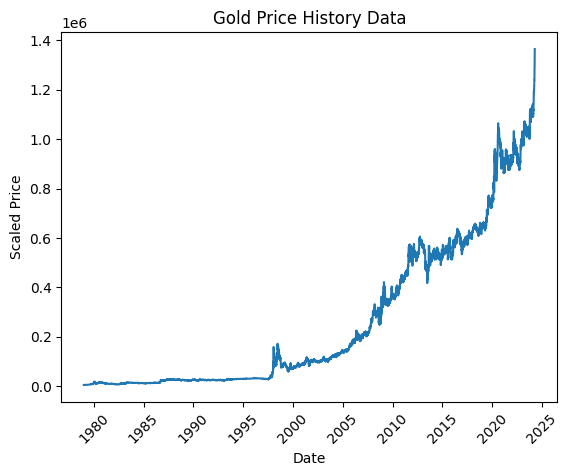

In [27]:
plt.plot(dt['Date'], dt['IDR'])
plt.xlabel("Date")
plt.ylabel("Scaled Price")
plt.title("Gold Price History Data")
plt.xticks(rotation=45)
plt.yticks(np.round(np.linspace(min(dt['IDR']), max(dt['IDR']), 5), minor=True))
plt.grid(True)
plt.show()

In [28]:
selected_columns = dt[['Date', 'IDR']]

selected_columns.to_csv(_DATASET_ENDPOINT / 'datasets/gold_idr_prices.csv')
print(f"CSV file 'gold_idr_prices.csv' has been created with the output.")

CSV file 'gold_idr_prices.csv' has been created with the output.
